## Feature Selection with Information gain or Mutual information in Classification Problem Statements

#### Mutual Information 

* Mutual Information estimates mutual information for a discrete target variable.
* Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. 
* If score is equal to zero then --> two random variables are independent
* If score is higher value the -->  higher dependency.
* A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

Formula ---> I(X ; Y) = H(X) – H(X | Y)

* here, I(X ; Y) is the mutual information for X and Y
* H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df  = pd.read_csv('wine.csv')

In [3]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 14)

In [5]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
X = df.drop(labels=['Wine'], axis=1)
y = df['Wine']

## Train Test split

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Applying the Mutual Information Classifier

In [9]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.41188008, 0.29955192, 0.17832226, 0.25128052, 0.14378025,
       0.48323698, 0.71893533, 0.1197537 , 0.27944292, 0.61759729,
       0.57081891, 0.55512534, 0.53539594])

In [10]:
# sorting that values in decending order and mapping to column names
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.718935
Color.int               0.617597
Hue                     0.570819
OD                      0.555125
Proline                 0.535396
Phenols                 0.483237
Alcohol                 0.411880
Malic.acid              0.299552
Proanth                 0.279443
Acl                     0.251281
Ash                     0.178322
Mg                      0.143780
Nonflavanoid.phenols    0.119754
dtype: float64

<AxesSubplot:>

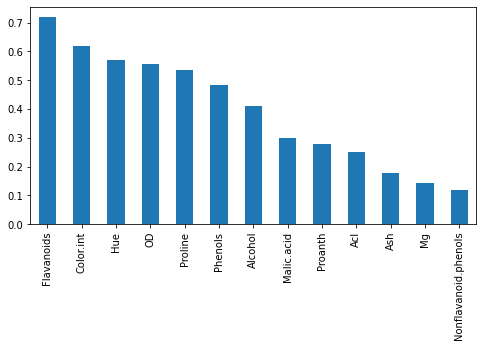

In [11]:
# plotting that values in graph
mutual_info.sort_values(ascending=False).plot.bar(figsize=(8, 4))

## We will select the  top 5 important features manually also or by using SelectKBest module 

* we can select the top 5 or 10 or 20 important features 
* or we can select the top 10 or 20 percentile features

In [12]:
# here we select the top 5 important features
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

## Conclusion:
    
By using this algorithm we can coclude that the above 5 columns are having high mutual information or information gain with the target

To learn more about about Mutual information for classification use this link : https://scikitlearn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html

Comparison of F-test and mutual information : 
https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py